In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.backends.cudnn as cudnn
import torch.optim as optim

import timm

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import os
import argparse

In [ ]:
from torchvision.datasets import CIFAR10
from torch.utils.data import random_split

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load Dataset

In [ ]:
dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 72164360.56it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


# Models

In [ ]:
print(timm.list_models())

['bat_resnext26ts', 'beit_base_patch16_224', 'beit_base_patch16_384', 'beit_large_patch16_224', 'beit_large_patch16_384', 'beit_large_patch16_512', 'beitv2_base_patch16_224', 'beitv2_large_patch16_224', 'botnet26t_256', 'botnet50ts_256', 'caformer_b36', 'caformer_m36', 'caformer_s18', 'caformer_s36', 'cait_m36_384', 'cait_m48_448', 'cait_s24_224', 'cait_s24_384', 'cait_s36_384', 'cait_xs24_384', 'cait_xxs24_224', 'cait_xxs24_384', 'cait_xxs36_224', 'cait_xxs36_384', 'coat_lite_medium', 'coat_lite_medium_384', 'coat_lite_mini', 'coat_lite_small', 'coat_lite_tiny', 'coat_mini', 'coat_small', 'coat_tiny', 'coatnet_0_224', 'coatnet_0_rw_224', 'coatnet_1_224', 'coatnet_1_rw_224', 'coatnet_2_224', 'coatnet_2_rw_224', 'coatnet_3_224', 'coatnet_3_rw_224', 'coatnet_4_224', 'coatnet_5_224', 'coatnet_bn_0_rw_224', 'coatnet_nano_cc_224', 'coatnet_nano_rw_224', 'coatnet_pico_rw_224', 'coatnet_rmlp_0_rw_224', 'coatnet_rmlp_1_rw2_224', 'coatnet_rmlp_1_rw_224', 'coatnet_rmlp_2_rw_224', 'coatnet_rmlp_2

In [ ]:
models = [
    ('ResNet18', timm.create_model('resnet18', pretrained=True)),
    #('ResNet50', timm.create_model('resnet50', pretrained=True)),
    #('EfficientNet', timm.create_model('efficientnet_b0', pretrained=True)),
    #('ViT', timm.create_model('vit_base_patch16_224', pretrained=True)),
    #('VGGNet', timm.create_model('vgg11', pretrained=True)),
    #('GoogLeNet', timm.create_model('googlenet', pretrained=True)), не работает
    #('DenseNet', timm.create_model('densenet121', pretrained=True))
]

# googlenet = torchvision.models.GoogLeNet(pretrained=True)
# models.append(('GoogLeNet', googlenet)) не работает

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

# Loss functions

In [ ]:
criterion = nn.CrossEntropyLoss()
# criterion = nn.MSELoss()
# criterion = nn.L1Loss()
# criterion = nn.BCELoss()
# criterion = nn.BCEWithLogitsLoss()
# criterion = nn.NLLLoss()
# criterion = nn.PoissonNLLLoss()
# criterion = nn.KLDivLoss()

In [ ]:
def train(model, train_loader, criterion, optimizer, device, num_epochs, start_epoch=0):
    model.to(device)
    model.train()
    losses, epochs, accuracies = [], [], []
    for epoch in range(start_epoch, num_epochs):
        running_loss = 0.0
        correct, total = 0, 0
        cool_progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}. Training {model.__class__.__name__}', unit='batch')
        for inputs, labels in cool_progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            cool_progress_bar.set_postfix(loss=running_loss / len(train_loader.dataset), acc=correct / total)
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        epochs.append(epoch + 1)

        os.makedirs('trained_models/', exist_ok=True)
        torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict(), 'loss': epoch_loss, 'accuracy': epoch_acc}, f'trained_models/{model.__class__.__name__}_epoch_{epoch + 1}.pth')
    return losses, epochs, accuracies

def continue_training(model, train_loader, criterion, optimizer, device, num_epochs, filepath):
    loaded_model = torch.load(filepath)
    model.load_state_dict(loaded_model["model_state_dict"])
    optimizer.load_state_dict(loaded_model["optimizer_state_dict"])
    start_epoch = loaded_model['epoch'] + 1

    losses, epochs, accuracies = train(model, train_loader, criterion, optimizer, device, num_epochs, start_epoch)

    return losses, epochs, accuracies


def validate(model, train_loader, criterion, device, num_epochs, start_epoch=0):
    model.to(device)
    model.eval()
    val_losses, val_epochs, val_accuracies = [], [], []
    with torch.no_grad():
      for epoch in range(start_epoch, num_epochs):
          running_loss = 0.0
          correct, total = 0, 0
          cool_progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}. Validating {model.__class__.__name__}', unit='batch')
          for inputs, labels in cool_progress_bar:
              inputs, labels = inputs.to(device), labels.to(device)
              outputs = model(inputs)
              loss = criterion(outputs, labels)
              running_loss += loss.item() * inputs.size(0)
              _, predicted = torch.max(outputs, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()
              cool_progress_bar.set_postfix(loss=running_loss / len(train_loader.dataset), acc=correct / total)
          val_epoch_loss = running_loss / len(train_loader.dataset)
          val_epoch_acc = correct / total
          val_losses.append(val_epoch_loss)
          val_accuracies.append(val_epoch_acc)
          val_epochs.append(1)
    return val_losses, val_epochs, val_accuracies

In [ ]:
num_epochs = 5
lr = 0.0001
#weight_decay = 0.0001 # пока не использовалось, потом добавить в optimizer

In [ ]:
results = {}
val_results = {}
for model_name, model in models:
    optimizer = torch.optim.Adam(model.parameters(), lr)
    losses, epochs, accuracies = train(model, train_loader, criterion, optimizer, device, num_epochs)
    results[model_name] = {'losses': losses, 'epochs': epochs, 'accuracies': accuracies}

    val_losses, val_epochs, val_accuracies = validate(model, train_loader, criterion, optimizer, device, num_epochs)
    val_results[model_name] = {'val_losses': val_losses, 'val_epochs': val_epochs, 'val_accuracies': val_accuracies}


Epoch 3/3. Validating ResNet: 100%|██████████| 625/625 [02:14<00:00,  4.66batch/s, acc=0.95, loss=0.157]


In [ ]:
print(results)
print(val_results)

{'ResNet18': {'losses': [0.18369939132332802, 0.12446357434689999], 'epochs': [4, 5], 'accuracies': [0.938775, 0.959225]}}
{'ResNet18': {'val_losses': [0.15671266875863074, 0.1567126688361168, 0.1567126686424017], 'val_epochs': [1, 2, 3], 'val_accuracies': [0.95015, 0.95015, 0.95015]}}


In [ ]:
# results = {'DenseNet': {'losses': [0.73685333365798, 0.1186659581720829, 0.05354168396368623, 0.039030596832558516, 0.030611663713492453, 0.026902917243912815, 0.02420135067049414, 0.01936436954587698, 0.020519037043955177, 0.018168568517547102, 0.019171807523351164, 0.014144064776599408, 0.013789470943668856, 0.013702556692319921, 0.013340166554646567], 'epochs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'accuracies': [0.8318, 0.963775, 0.98445, 0.98825, 0.99055, 0.9916, 0.9928, 0.993925, 0.99365, 0.99415, 0.99385, 0.995875, 0.995925, 0.995675, 0.99595]}}

In [ ]:
filepath = "/content/trained_models/ResNet_epoch_3.pth"

for model_name, model in models:
    losses, epochs, accuracies = continue_training(model, train_loader, criterion, optimizer, device, num_epochs, filepath)
    results[model_name].update({'losses': losses, 'epochs': epochs, 'accuracies': accuracies})

In [ ]:
os.makedirs('results', exist_ok=True)
for model_name, data in results.items():
    np.savez(f'results/{model_name}_results.npz', losses=data['losses'], epochs=data['epochs'], accuracies=data['accuracies'])

# for model_name, data in val_results.items():
#     np.savez(f'results/{model_name}_val_results.npz', losses=data['losses'], epochs=data['epochs'], accuracies=data['accuracies'])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

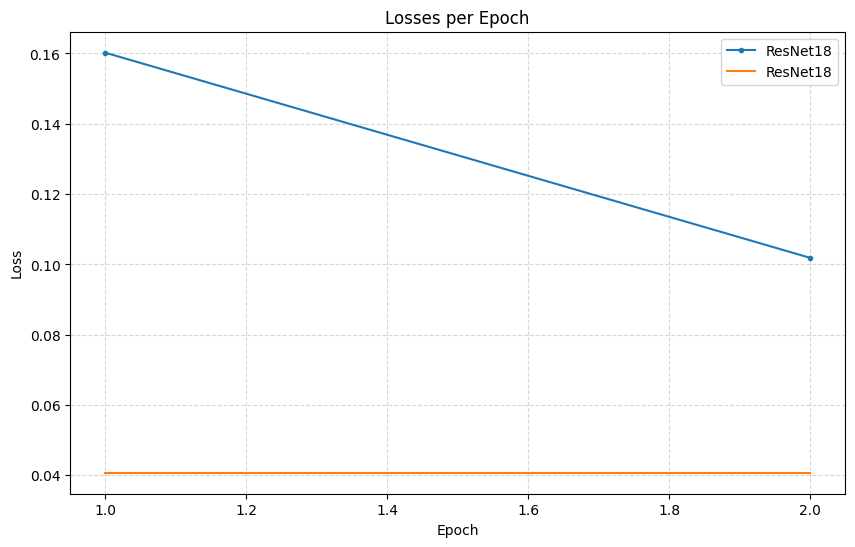

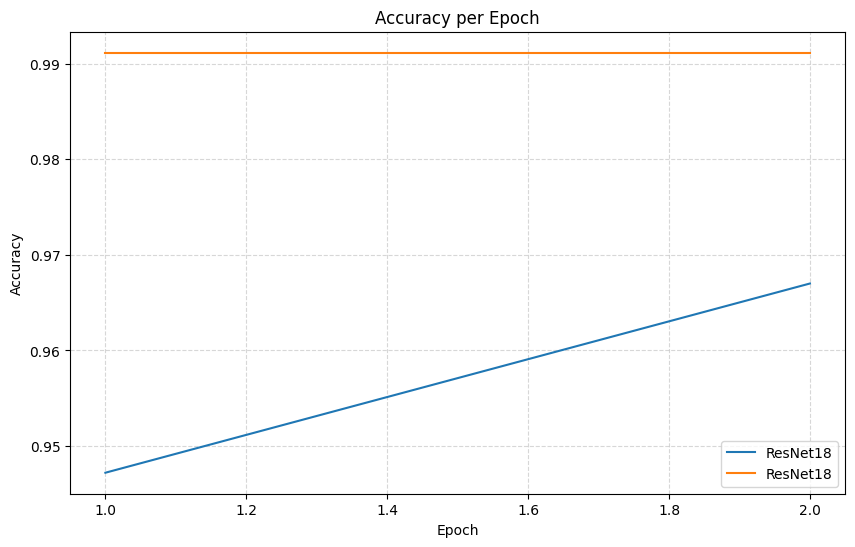

In [ ]:
import matplotlib.pyplot as plt

# results = {
#     'ResNet18': {'losses': [1.6998418815188938, 0.42324265739652844], 'epochs': [1, 2]},
#     'ResNet50': {'losses': [1.689236854256524, 0.3228870271788703], 'epochs': [1, 2]},
#     'EfficientNet': {'losses': [0.656188617808289, 0.11389627428981992], 'epochs': [1, 2]},
#     'ViT': {'losses': [0.23428887585136626, 0.10356608468770152], 'epochs': [1, 2]},
#     'VGGNet': {'losses': [0.5293657882160611, 0.16392043011718327], 'epochs': [1, 2]},
#     'DenseNet': {'losses': [0.6854921842310163, 0.11557560107575522], 'epochs': [1, 2]}
# }

def plot_losses(results, val_results):
    plt.figure(figsize=(10, 6))
    for model_name, data in results.items():
        # available flags for customizing: linestyle="--", linewidth=2, marker,
        plt.plot(data['epochs'], data['losses'], label=model_name, marker=".")
    for model_name, data in val_results.items():
        plt.plot(data['val_epochs'], data['val_losses'], label=model_name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Losses per Epoch')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

def plot_accuracies(results, val_results):
    plt.figure(figsize=(10, 6))
    for model_name, data in results.items():
        plt.plot(data['epochs'], data['accuracies'], label=model_name)
    for model_name, data in val_results.items():
        plt.plot(data['val_epochs'], data['val_accuracies'], label=model_name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

plot_losses(results, val_results)
plot_accuracies(results, val_results)

In [ ]:
import numpy as np

for model_name, data in results.items():
  losses = results[model_name]['losses']
  accuracies = results[model_name]['accuracies']

print("Stats for nerds")
print(f"Max loss: {np.max(losses)} \nAverage loss: {np.mean(losses)} \nMin loss: {np.min(losses)} \n\nMax accuracy: {np.max(accuracies)} \nAverage accuracy: {np.mean(accuracies)} \nMin accuracy: {np.min(accuracies)}")
print(f"\nLoss std: {np.std(losses)} \nAccuracy std: {np.std(accuracies)}")


Stats for nerds
Max loss: 0.1602107424378395 
Average loss: 0.13104981228262186 
Min loss: 0.10188888212740421 

Max accuracy: 0.967 
Average accuracy: 0.9571000000000001 
Min accuracy: 0.9472

Loss std: 0.029160930155217646 
Accuracy std: 0.009899999999999964
